# Pair Programming Intro Machine Learning

Buscad un conjunto de datos a analizar
Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico, ya que tambien serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [1]:
# Importamos las librerías que necesitamos:

# para el tratamiento de los datos:

import pandas as pd
import numpy as np

# para visualizarlos:

import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos un tamaño común para todas las gráficas:

plt.rcParams["figure.figsize"] = (10,8)

# Configuramos los warnings:

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns = None

In [4]:
# Hemos obtenido de internet un dataset que recopila datos sobre el estilo de vida y el bienestar:
df = pd.read_csv("datos/Wellbeing_and_lifestyle_data_Kaggle.csv", index_col= 0)
df.head(7)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
Timestamp,,,,,,,,,,,,,,,,,,,,,,,
7/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5
7/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6
7/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,631.6
7/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,622.7
7/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,663.9
7/8/15,3,2,3,9,10,10,2,3,1,6,1,7,10,8,0,2,2,10,8,3,51 or more,Female,722.3
7/8/15,4,2,10,6,10,10,3,5,2,8,8,7,5,7,10,0,2,10,8,10,51 or more,Male,727.2


In [5]:
df.shape 

(15972, 23)

Nuestro dataset tiene originalmente 23 filas y 15972 filas, para optimizar el trabajo vamos a descartar algunas de las columnas.

In [6]:
df.columns

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [7]:
df2 = df.copy()

Vamos a quedarnos con las variables que recojan aspectos más de tipo físico.

In [8]:
df2 = df.drop(['PLACES_VISITED','SUPPORTING_OTHERS','ACHIEVEMENT','DONATION','TODO_COMPLETED', 'FLOW','TODO_COMPLETED', 'FLOW','LOST_VACATION', 'DAILY_SHOUTING','PERSONAL_AWARDS','LIVE_VISION'], axis = 1)

In [9]:
df2.columns

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'CORE_CIRCLE', 'SOCIAL_NETWORK',
       'BMI_RANGE', 'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER',
       'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [10]:
df2.dtypes

FRUITS_VEGGIES               int64
DAILY_STRESS                object
CORE_CIRCLE                  int64
SOCIAL_NETWORK               int64
BMI_RANGE                    int64
DAILY_STEPS                  int64
SLEEP_HOURS                  int64
SUFFICIENT_INCOME            int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

In [11]:
# Categorizamos las siguientes variables:
df2['DAILY_STRESS']=df2['DAILY_STRESS'].astype('category')
df2['BMI_RANGE']=df2['BMI_RANGE'].astype('category')
df2['SUFFICIENT_INCOME']=df2['SUFFICIENT_INCOME'].astype('category')

Finalmente, estas son las columnas que creemos que más puedan influir en el bienestar y con las que vamos a trabajar:

FRUITS_VEGGIES ------------> nº fruta por día

DAILY_STRESS   ------------> nivel diario estrés

CORE_CIRCLE    ------------> nº de personas cercanas

SOCIAL_NETWORK  -----------> nº interacciones por dia en rrss

BMI_RANGE   ---------------> masa corporal  índice

DAILY_STEPS ---------------> nº pasos diarios (1000)

SLEEP_HOURS ---------------> horas sueño por dia

SUFFICIENT_INCOME ---------> salario

TIME_FOR_PASSION ----------> horas/día

WEEKLY_MEDITATION----------> nº veces/semana

AGE -----------------------> franjas de edad

GENDER --------------------> Mujer/Hombre

WORK_LIFE_BALANCE_SCORE ---> medida del estado de bienestar

De todas ellas, "WORK_LIFE_BALANCE_SCORE" será nuestra variable respuesta.

In [12]:
df2.shape

(15972, 13)

In [13]:
df2.head(4)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
Timestamp,,,,,,,,,,,,,
7/7/15,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5
7/7/15,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6
7/7/15,2,3,4,10,2,4,8,2,8,3,36 to 50,Female,631.6
7/7/15,3,3,3,7,2,5,5,1,2,0,51 or more,Female,622.7


In [14]:
# vamos a resetear el índice:
df2.reset_index(inplace = True)

In [15]:
df2.head(2)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6


In [16]:
# Y a eliminar la columna "Timestamp"
df2 = df2.drop(['Timestamp'], axis = 1)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   FRUITS_VEGGIES           15972 non-null  int64   
 1   DAILY_STRESS             15972 non-null  category
 2   CORE_CIRCLE              15972 non-null  int64   
 3   SOCIAL_NETWORK           15972 non-null  int64   
 4   BMI_RANGE                15972 non-null  category
 5   DAILY_STEPS              15972 non-null  int64   
 6   SLEEP_HOURS              15972 non-null  int64   
 7   SUFFICIENT_INCOME        15972 non-null  category
 8   TIME_FOR_PASSION         15972 non-null  int64   
 9   WEEKLY_MEDITATION        15972 non-null  int64   
 10  AGE                      15972 non-null  object  
 11  GENDER                   15972 non-null  object  
 12  WORK_LIFE_BALANCE_SCORE  15972 non-null  float64 
dtypes: category(3), float64(1), int64(7), object(2)
memory usage:

Contamos con 8 variables numéricas.

In [18]:
df2["WORK_LIFE_BALANCE_SCORE"].unique()

array([609.5, 655.6, 631.6, ..., 651.7, 611.5, 790.5])

In [19]:
df2["GENDER"].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
#Hacemos un describe con las variables categóricas:
df2.describe(include=["object","category"]).T

,count,unique,top,freq
DAILY_STRESS,15972,7,3,4398
BMI_RANGE,15972,2,1,9413
SUFFICIENT_INCOME,15972,2,2,11643
AGE,15972,4,21 to 35,6108
GENDER,15972,2,Female,9858


In [24]:
#Hacemos un describe con las numéricas, en este caso no hace falta especificar nada:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15972.0,2.922677,1.442694,0.0,2.0,3.0,4.0,5.0
CORE_CIRCLE,15972.0,5.508077,2.840334,0.0,3.0,5.0,8.0,10.0
SOCIAL_NETWORK,15972.0,6.474267,3.086672,0.0,4.0,6.0,10.0,10.0
DAILY_STEPS,15972.0,5.703606,2.891013,1.0,3.0,5.0,8.0,10.0
SLEEP_HOURS,15972.0,7.042888,1.199044,1.0,6.0,7.0,8.0,10.0
TIME_FOR_PASSION,15972.0,3.326572,2.729293,0.0,1.0,3.0,5.0,10.0
WEEKLY_MEDITATION,15972.0,6.233346,3.016571,0.0,4.0,7.0,10.0,10.0
WORK_LIFE_BALANCE_SCORE,15972.0,666.751503,45.019868,480.0,636.0,667.7,698.5,820.2


In [25]:
# Comprobamos si tenemos nulos:
df2.isnull().sum()

FRUITS_VEGGIES             0
DAILY_STRESS               0
CORE_CIRCLE                0
SOCIAL_NETWORK             0
BMI_RANGE                  0
DAILY_STEPS                0
SLEEP_HOURS                0
SUFFICIENT_INCOME          0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [26]:
# Comprobamos también si tenemos duplicados:
df2.duplicated().sum()

686

In [27]:
# Tenemos duplicados que vamos a eliminar:
df2.drop_duplicates(inplace = True)

In [28]:
# Verificamos que ya no tengamos duplicados:
df2.duplicated().sum()

0

In [29]:
df2.shape # Vemos que se ha reducido el número de filas:

(15286, 13)

In [30]:
# Vamos a comprobar si nuestras variables numéricas tienen outliers:
df2_numericas = df2.select_dtypes(include = np.number)
df2_numericas.head(2)

,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,DAILY_STEPS,SLEEP_HOURS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
0,3,5,5,5,7,0,5,609.5
1,2,3,10,5,8,2,6,655.6


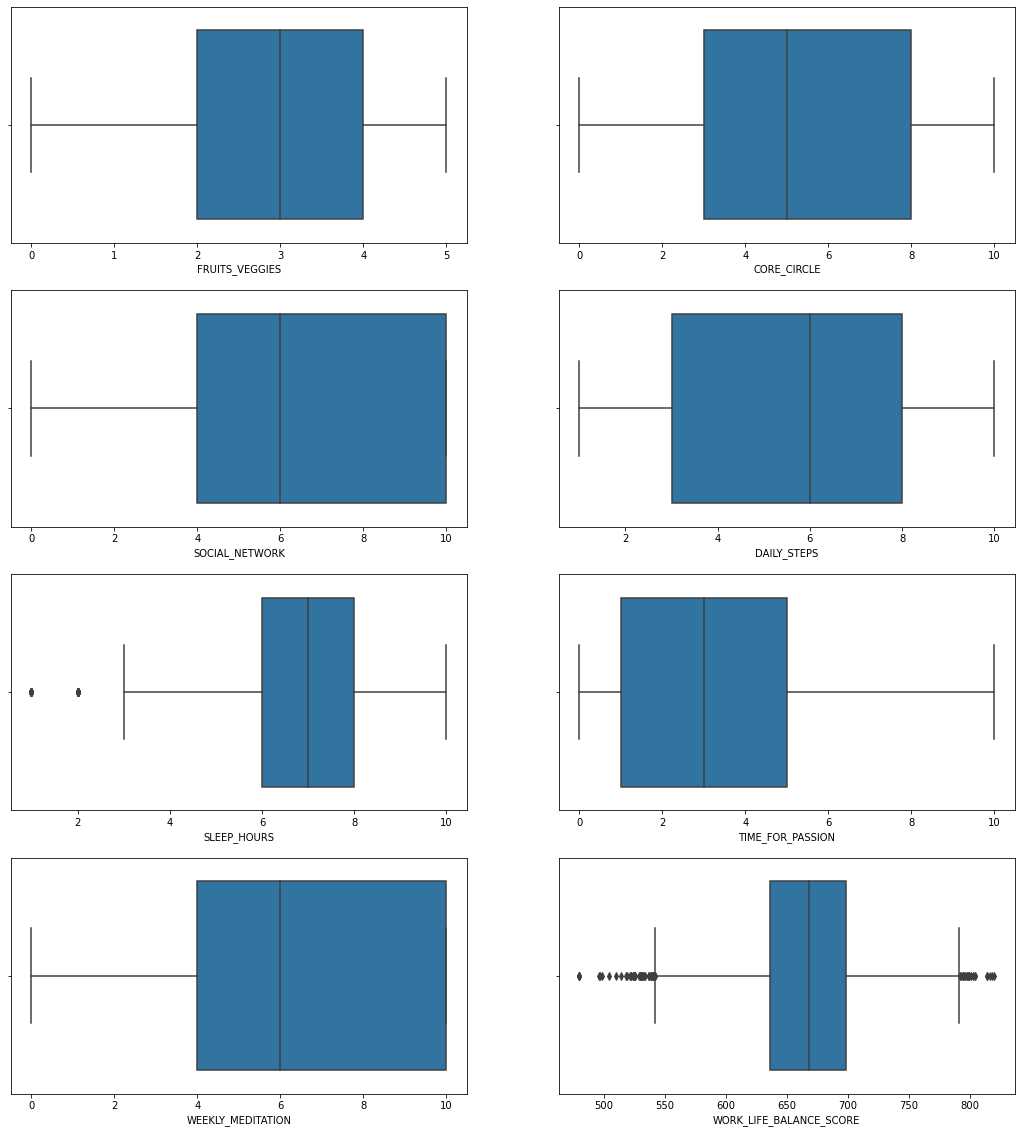

In [31]:
# Vamos a visualizarlas con boxplot:
fig, axes = plt.subplots(4,2, figsize = (18,20))
axes = axes.flat

for indice, columna in enumerate(df2_numericas.columns):
    sns.boxplot(x = df2_numericas[columna], data = df2, ax = axes[indice])

#fig.delaxes(axes[-1]);

Vemos en las gráficas que tenemos muy pocos outliers en "Sleep_hours" y en "Work Balance Score"

In [32]:

def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario que almacene los índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) 
    
    return dicc_indices

In [33]:
# Comprobamos los outliers de nuestra variable respuesta:
index_score = detectar_outliers(["WORK_LIFE_BALANCE_SCORE"],df2)
len(index_score["WORK_LIFE_BALANCE_SCORE"])

67

In [34]:
df2.shape

(15286, 13)

In [35]:
lista_indice = index_score["WORK_LIFE_BALANCE_SCORE"]

In [36]:
df2_sin_outliers = df2.drop(lista_indice, axis = 0)

In [37]:
df2_sin_outliers.shape

(15219, 13)

Comprobamos así que hemos pasado de 15286 filas a 15219 al eliminar los outliers de la variable respuesta 

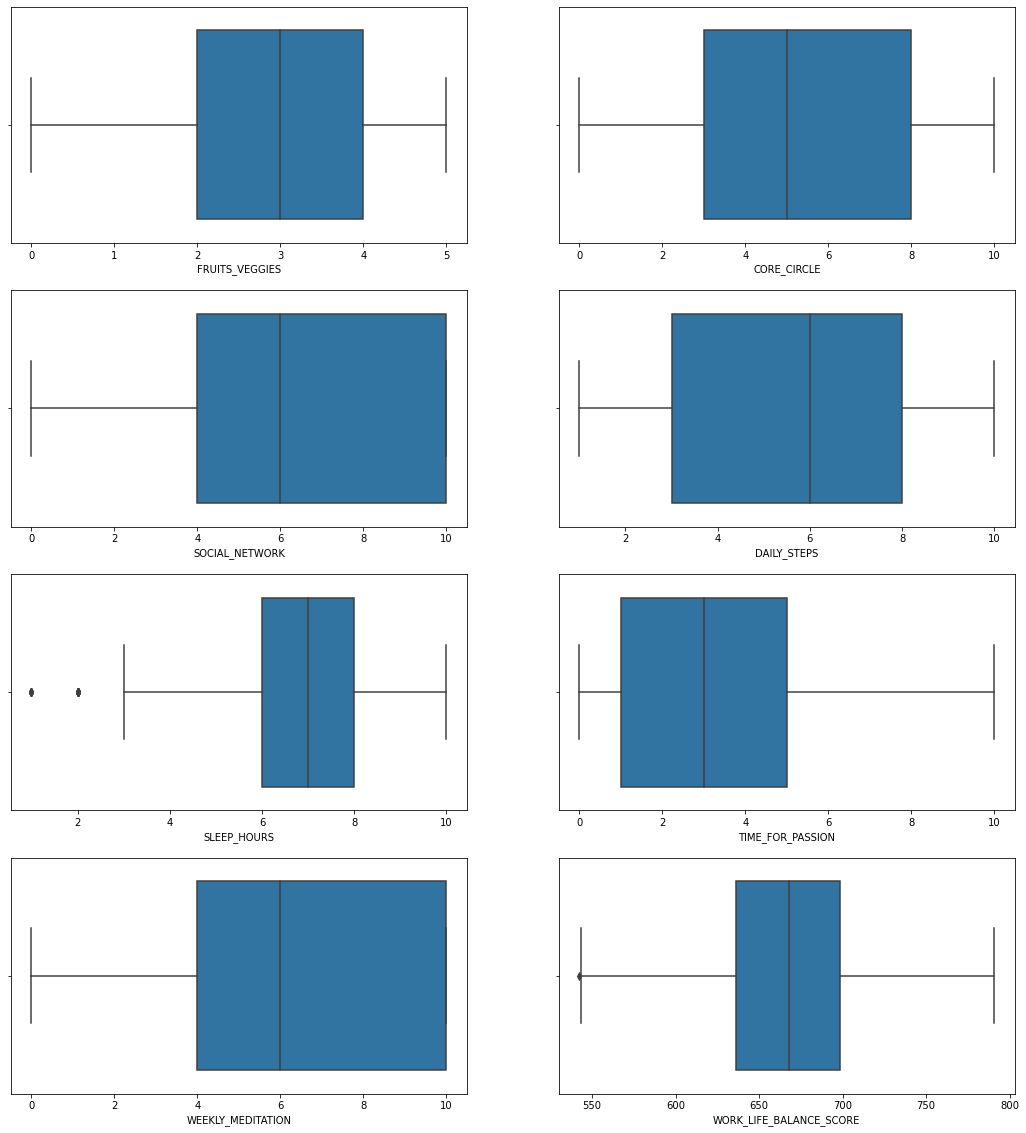

In [38]:
fig, axes = plt.subplots(4,2, figsize = (18,20))
axes = axes.flat

for indice, columna in enumerate(df2_sin_outliers.select_dtypes(include =np.number).columns):
    sns.boxplot(x = df2_sin_outliers[columna], data = df2, ax = axes[indice])

#fig.delaxes(axes[-1]);

## Analizaremos las relaciones entre las variables:

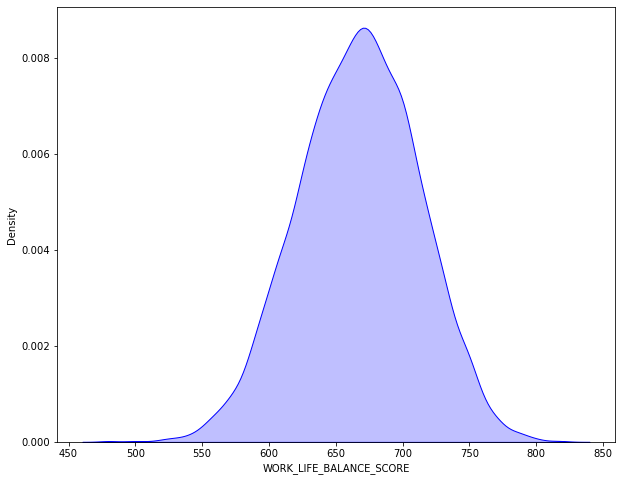

In [39]:
# Vemos primero cómo está distribuída la variable respuesta:
sns.distplot( df2["WORK_LIFE_BALANCE_SCORE"], hist = False, color = "blue", kde_kws = {"shade": True, "linewidth": 1});

Queremos conocer también cómo son nuestras variables predictoras:

In [64]:
# Cuáles son los principales estadísticos de las variables numéricas:
df2.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15286.0,2.923983,1.442694,0.0,2.0,3.0,4.0,5.0
CORE_CIRCLE,15286.0,5.517074,2.837400,0.0,3.0,5.0,8.0,10.0
SOCIAL_NETWORK,15286.0,6.491365,3.084020,0.0,4.0,6.0,10.0,10.0
DAILY_STEPS,15286.0,5.717912,2.886237,1.0,3.0,6.0,8.0,10.0
SLEEP_HOURS,15286.0,7.038401,1.200056,1.0,6.0,7.0,8.0,10.0
TIME_FOR_PASSION,15286.0,3.327882,2.731594,0.0,1.0,3.0,5.0,10.0
WEEKLY_MEDITATION,15286.0,6.217912,3.014143,0.0,4.0,6.0,10.0,10.0
WORK_LIFE_BALANCE_SCORE,15286.0,666.849379,45.051396,480.0,636.0,667.9,698.5,820.2


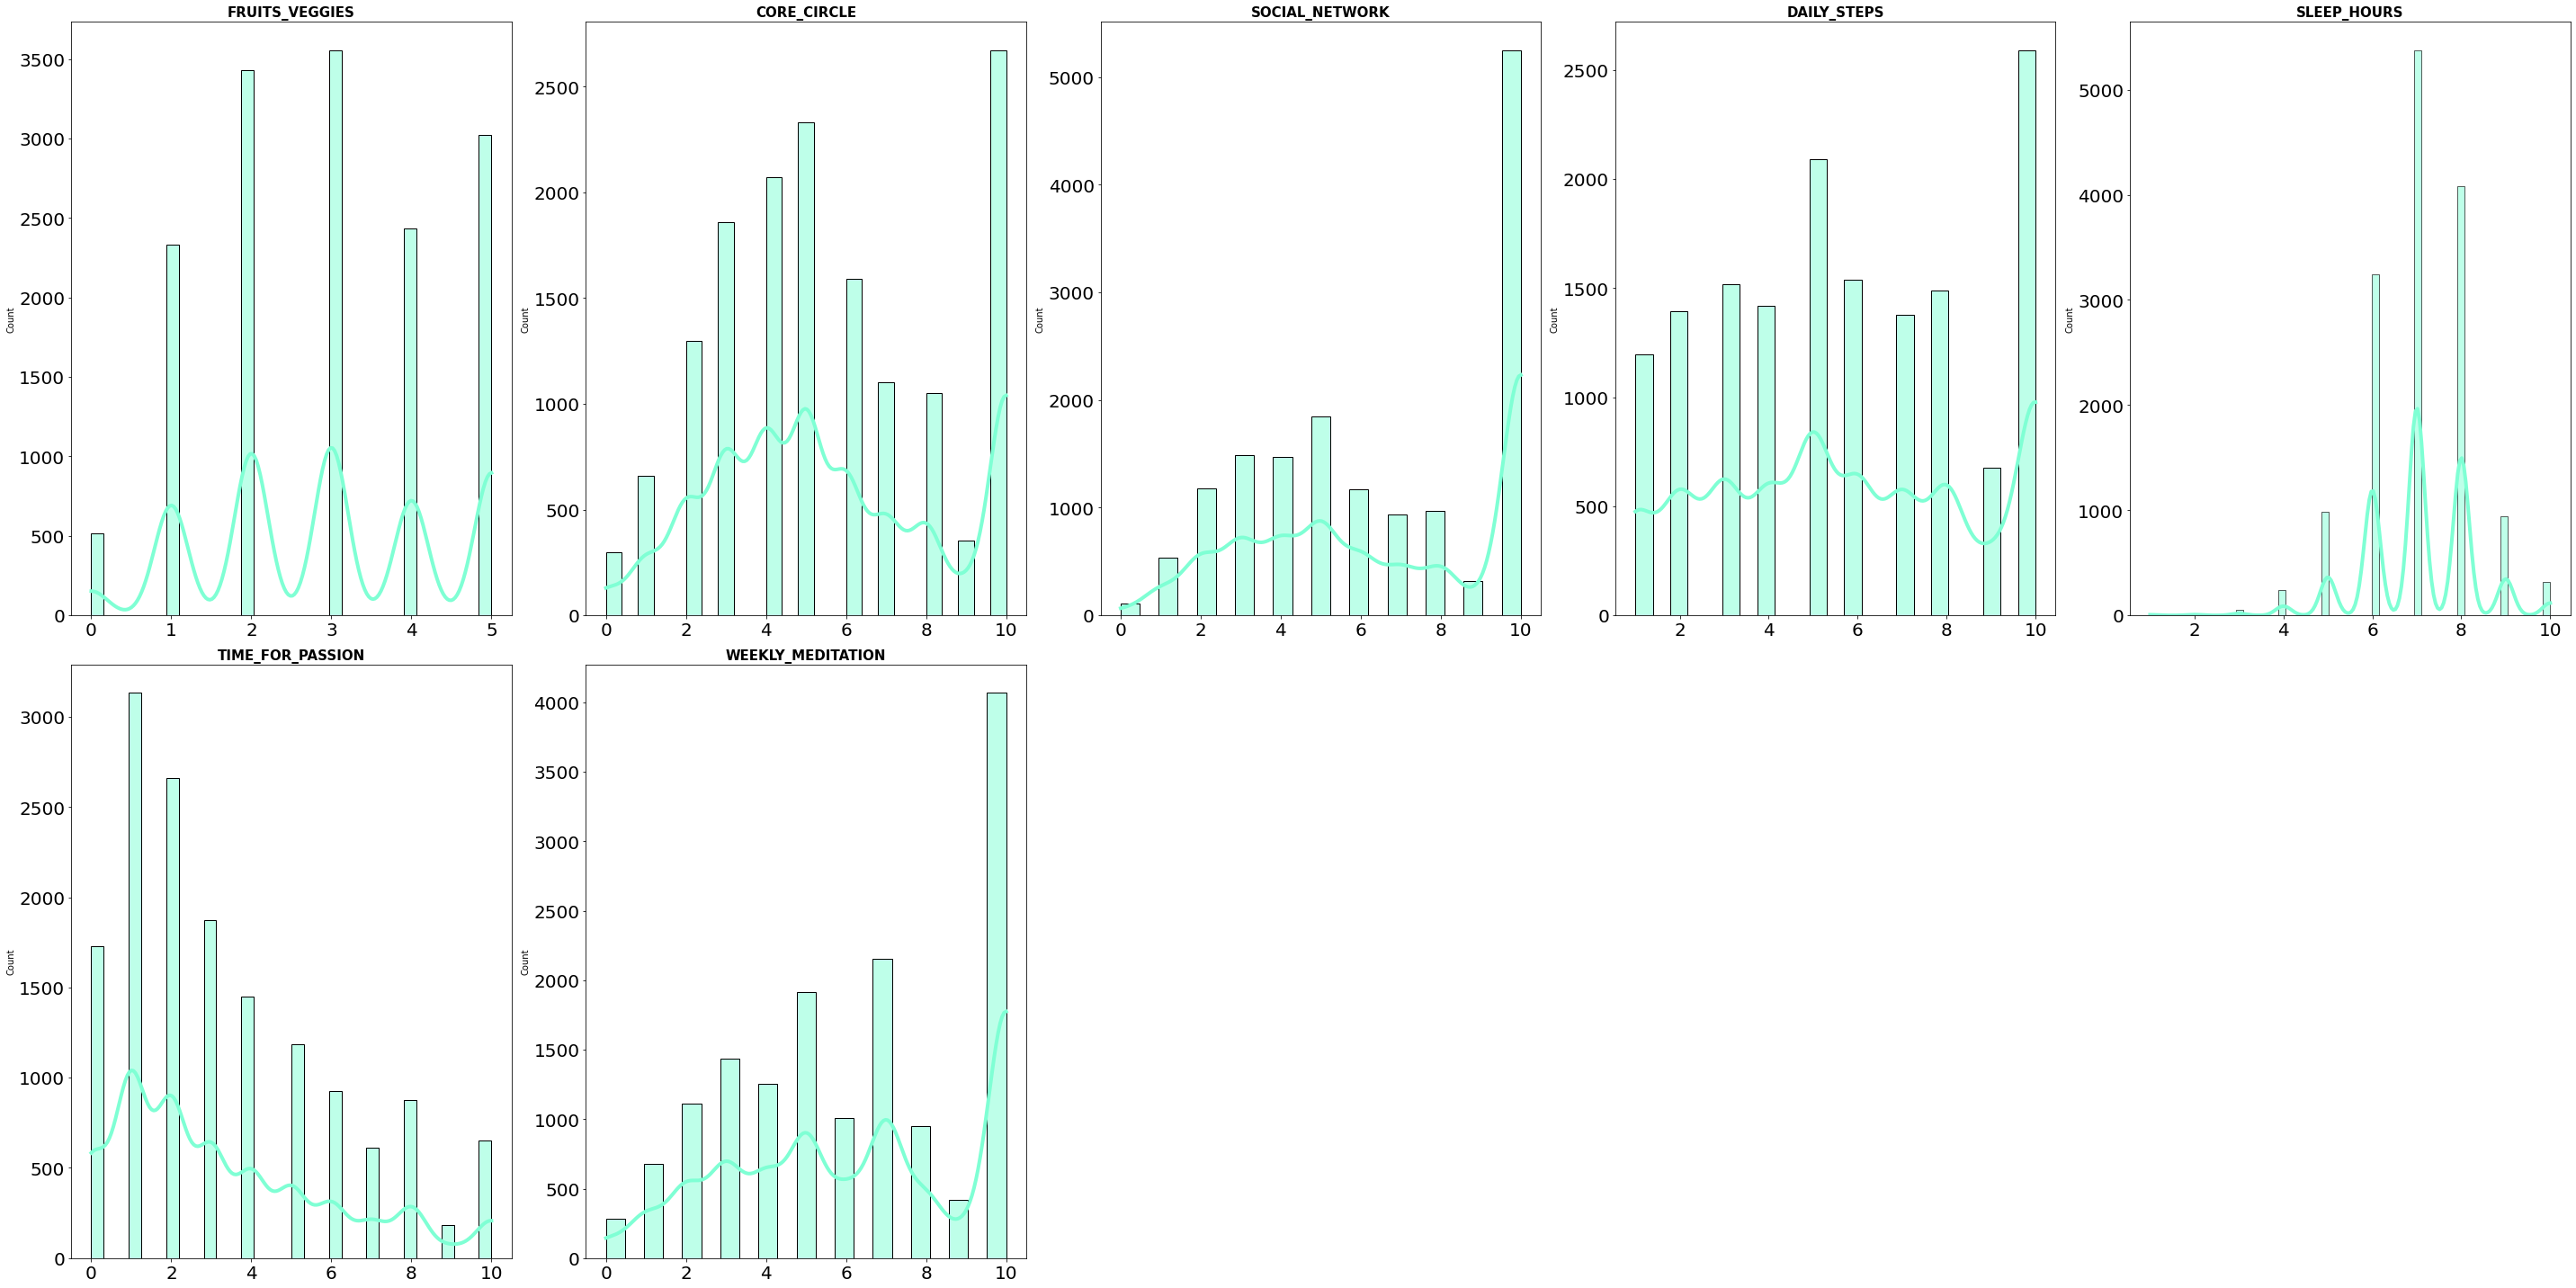

In [68]:
# Y cómo se distribuyen:

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (40, 20))


axes = axes.flat

columnas_numeric = df2.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("WORK_LIFE_BALANCE_SCORE")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df2,
        x = colum,
        kde = True, 
        color = "aquamarine", 
        line_kws = {"linewidth": 4}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

Para observar la relación entre la variable respuesta y las variables predictoras vamos a hacer gráficas:

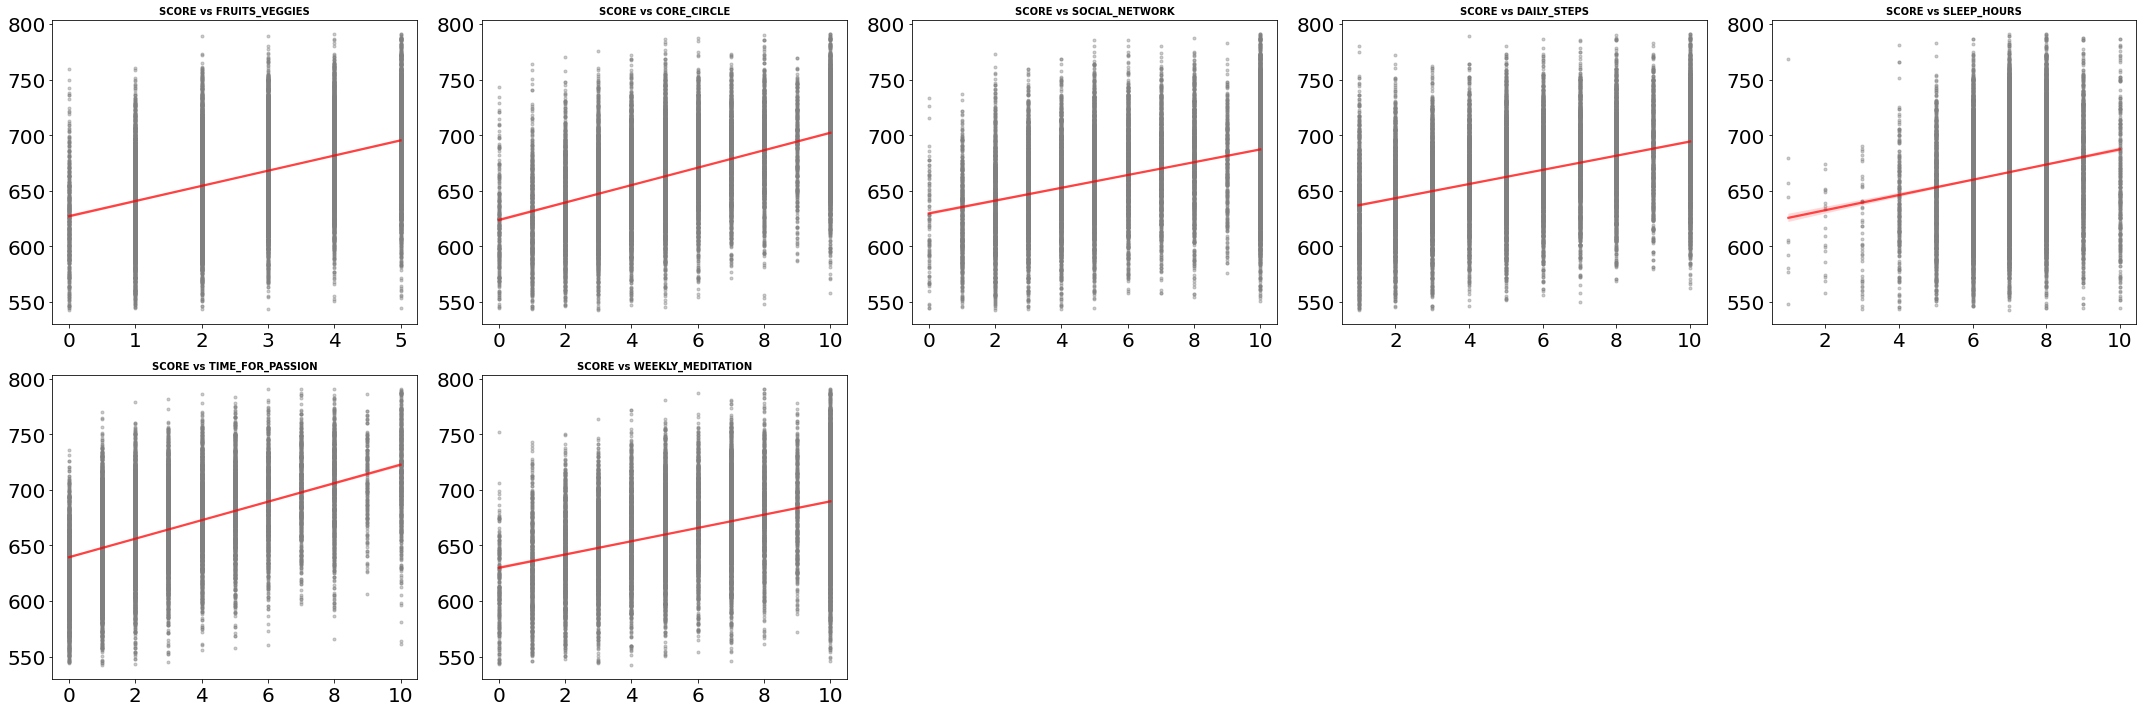

In [62]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df2_sin_outliers.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("WORK_LIFE_BALANCE_SCORE")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df2_sin_outliers[colum], 
        y = df2_sin_outliers["WORK_LIFE_BALANCE_SCORE"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"SCORE vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

Podemos observar cierta relación al ver como la línea roja sigue en todos los casos una tendencia ascendente. Vemos en la primera gráfica de la segunda fila que representa la puntuación de bienestar y el tiempo dedicado a los hobbies,  como la relación se hace más visible.

Mediante un heatmap observamos la correlación entre las variables numéricas:

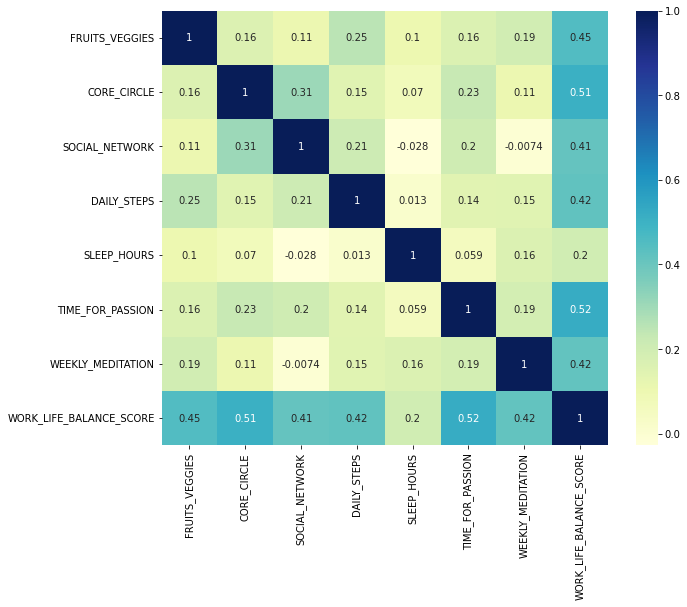

In [69]:
sns.heatmap(df2.corr(), 
           cmap = "YlGnBu", 
           annot = True);

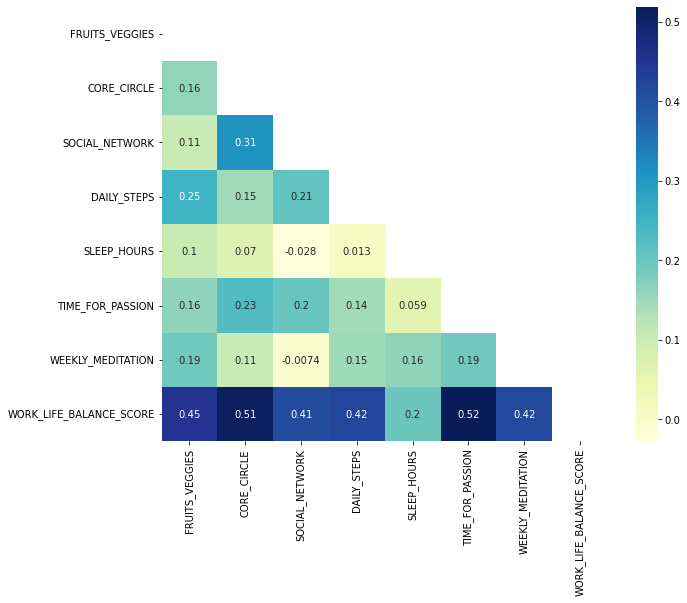

In [71]:

mask = np.triu(np.ones_like(df2.corr(), dtype = np.bool)) #Creamos así un dataframe todo de unos con la 
                                                          #misma forma que la matriz de correlación

sns.heatmap(df2.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

Aunque el heatmap se hace principalmente para ver cómo se relacionan las variables predictoras entre si, hemos dejado también la variable respuesta. Vemos que existe una correlación positiva entre la mayoría de las variables y nuestra variable respuesta. Sobretodo en el tiempo dedicado a las aficiones y en el círculo social.
De todas ellas, la que menos correlacionada está con la variable respuesta es la correspondiente a las horas de sueño.
Entre las variables predictoras no hay una relación excesivamente fuerte.

In [43]:
df2.to_csv("datos/wellness_1.csv")